In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [3]:
N = 10000                  #no of users
d = 10                     #no of ads                     
                    
ads_selected = []

no_of_selection = [0]* d   #Ni(n)
sum_of_reward = [0]* d   #Ri(n)
total_reward = 0         # sum of all rewards

for n in range(0, N):
    ad = 0                      # counter of ads
    max_ucb = 0
    for i in range(0, d):
        if no_of_selection[i] >0:
            avg_reward = sum_of_reward[i]/no_of_selection[i]
            delta_i = math.sqrt((3/2*math.log(n+1))/(no_of_selection[i]))
            upper_bound = avg_reward + delta_i                               #step 2
        else:
            upper_bound = 1e400
            
        if upper_bound > max_ucb:
            max_ucb = upper_bound
            ad = i
    ads_selected.append(ad)                         #ads_selected.append(i)
    no_of_selection[ad] +=1                        #no_of_selections[i+1]
    reward = dataset.values[n, ad]
    sum_of_reward[ad] += reward
    total_reward += reward 

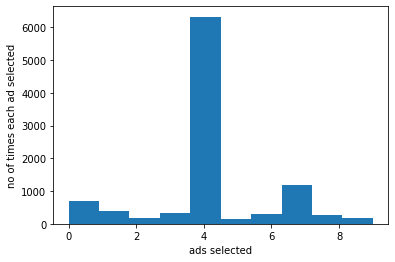

In [4]:
plt.hist(ads_selected)
plt.xlabel('ads selected')
plt.ylabel('no of times each ad selected')
plt.show()

In [5]:
# check if changed no of rounds from 10000 to 550, does it still gives proper soln

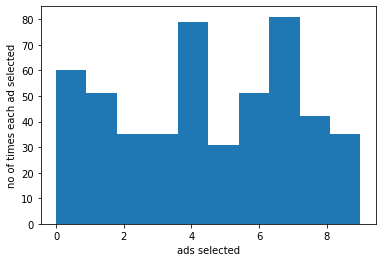

In [6]:
N = 500                  #no of users
d = 10                     #no of ads                     
                    
ads_selected = []

no_of_selection = [0]* d   #Ni(n)
sum_of_reward = [0]* d   #Ri(n)
total_reward = 0         # sum of all rewards

for n in range(0, N):
    ad = 0                      # counter of ads
    max_ucb = 0
    for i in range(0, d):
        if no_of_selection[i] >0:
            avg_reward = sum_of_reward[i]/no_of_selection[i]
            delta_i = math.sqrt((3/2*math.log(n+1))/(no_of_selection[i]))
            upper_bound = avg_reward + delta_i                               #step 2
        else:
            upper_bound = 1e400
            
        if upper_bound > max_ucb:
            max_ucb = upper_bound
            ad = i
    ads_selected.append(ad)                         #ads_selected.append(i)
    no_of_selection[ad] +=1                        #no_of_selections[i+1]
    reward = dataset.values[n, ad]
    sum_of_reward[ad] += reward
    total_reward += reward 
    
plt.hist(ads_selected)
plt.xlabel('ads selected')
plt.ylabel('no of times each ad selected')
plt.show()    

In [7]:
# it needs atleast 600 rounds 